In [1]:
import torch
from torch import nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
from numpy.random import multivariate_normal
def getxy(x=0,y=0, num=1000,  std=0.5):
    return multivariate_normal(np.array([x,y]), 
                               np.array([[0,std],[std,0]]), num)


/home/arun/py/tf3.5/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: covariance is not positive-semidefinite.


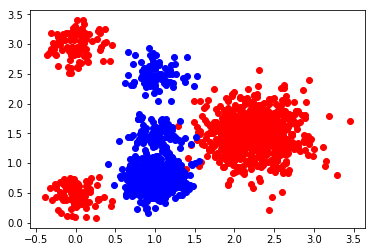

In [3]:
pos = []
xy = getxy(0, 0.5, 100, 0.03)
plt.plot(xy[:,0],xy[:,1], 'ro')
pos.append(xy)
xy = getxy(0, 3.0, 100, 0.03)
plt.plot(xy[:,0],xy[:,1], 'ro')
pos.append(xy)
xy = getxy(2.25, 1.5, 800, 0.1)
plt.plot(xy[:,0],xy[:,1], 'ro')
pos.append(xy)
pos = np.concatenate(pos)

neg = []
xy = getxy(1.0, 0.75, 800, 0.03)
plt.plot(xy[:,0],xy[:,1], 'bo')
neg.append(xy)
xy = getxy(1.0, 1.5, 100, 0.03)
plt.plot(xy[:,0],xy[:,1], 'bo')
neg.append(xy)
xy = getxy(1.0, 2.5, 100, 0.03)
plt.plot(xy[:,0],xy[:,1], 'bo')
neg.append(xy)
neg = np.concatenate(neg)

In [144]:
posy = np.ones((pos.shape[0],1))
negy = -1 * np.ones((neg.shape[0],1))
posxy = np.concatenate([pos,posy],1)
negxy = np.concatenate([neg,negy],1)
xy = np.concatenate([posxy,negxy],0)

In [145]:
from random import shuffle, seed
l = (list(range(len(xy))))
seed(1)
shuffle(l)
xy = xy[l]
XY = torch.from_numpy(xy)

In [146]:
class HingeLoss(nn.Module):
    def __init__(self, margin=0):
        super(HingeLoss, self).__init__()
        self.margin = margin

    def forward(self, y_pred, y):
        return torch.clamp(1-y*(y_pred-self.margin),0).sum()/len(y)


In [147]:
num_epochs = 600
learning_rate = 0.1

from torch import nn
from torch.autograd import Variable

#model = nn.Sequential(nn.Linear(2,1),nn.Sigmoid())
model = nn.Sequential(nn.Linear(2,1), nn.Tanh())
#model.weight.data[0][0] = 2
# Loss and Optimizer
criterion = HingeLoss()#nn.SoftMarginLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [148]:
X = XY[:,:2].float()
Y = XY[:,2].float()
for epoch in range(100000):
    optimizer.zero_grad()  
    outputs = model(Variable(X))
    loss = criterion(outputs,Variable(Y))
    loss.backward()
    #model.weight.grad.data[0][0] = 0
    optimizer.step()
    
    if epoch%1000==0:  print(loss.data[0])
    

1.0394988059997559
0.27155566215515137
0.247219979763031
0.23795382678508759
0.23286756873130798
0.22958587110042572
0.22726355493068695
0.22551846504211426
0.22415059804916382
0.22304432094097137
0.22212769091129303
0.2213534712791443
0.22068919241428375
0.22011180222034454
0.21960437297821045
0.2191542685031891
0.2187517285346985
0.21838915348052979
0.21806058287620544
0.2177611142396927
0.21748685836791992
0.2172345370054245
0.21700149774551392
0.2167854607105255
0.21658451855182648
0.21639707684516907
0.21622173488140106
0.21605727076530457
0.21590261161327362
0.2157568633556366
0.21561922132968903
0.2154889702796936
0.21536551415920258
0.21524833142757416
0.21513685584068298
0.2150307297706604
0.2149295061826706
0.21483279764652252
0.2147403359413147
0.21465186774730682
0.21456694602966309
0.21448563039302826
0.21440738439559937
0.21433228254318237
0.21425989270210266
0.2141902893781662
0.21412307024002075
0.2140582948923111
0.21399569511413574
0.21393539011478424
0.21387697756290

In [149]:
y_pred = outputs.data
#print((y_pred==(Y.byte())).float().mean())

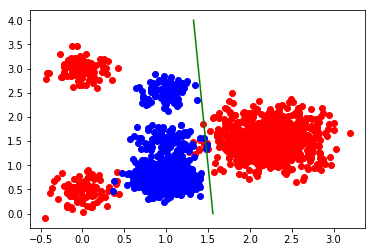

In [150]:
a = model[0].weight.data[0][0]
b = model[0].weight.data[0][1]
c = model[0].bias.data[0]
a,b,c
def getx(y):
    return -(b*y+c)/a
y1,y2 = 0,4
x1,x2 = getx(y1),getx(y2)
plt.plot(pos[:,0],pos[:,1], 'ro')
plt.plot(neg[:,0],neg[:,1], 'bo')
plt.plot([x1,x2],[y1,y2], 'g')

In [151]:
tp = (((Y==1)&(y_pred>0))).sum()
fp = (((Y==-1)&(y_pred>0))).sum()
fn = (((Y==1)&(y_pred<0))).sum()
tn = (((Y==-1)&(y_pred<0))).sum()
print("acc",(tp+tn)/(len(Y)))
print("recall", (tp/(tp+fn)))
print("prec", tp/(tp+fp))

acc 0.8955
recall 0.792
prec 0.9987389659520807


In [179]:
lh(model(x),y).max()

Variable containing:
 2
[torch.FloatTensor of size 1]

In [180]:
def lh(fx,y):
    return torch.clamp(1-y*fx,0)
def l01(fx,y):
     return ((y==1)*(fx<=0)) + ((y==-1)*(fx>0))
def tp(fx,y):
    return ((y==1)*(1-l01(fx,y))).float().sum()
def fp(fx,y):
    return ((y==-1)*(l01(fx,y))).float().sum()
def tpl(fx,y):
    return ((y==1).float()*(1-lh(fx,y))).sum()
def fpu(fx,y):
    return ((y==-1).float()*(lh(fx,y))).sum()
def Lp(fx,y):
    return ((y==1).float()*(lh(fx,y))).float().sum()
def Ln(fx,y):
    return ((y==-1).float()*(lh(fx,y))).float().sum()
def Yp(y):
    return (y==1).float().sum()
def RatPg(fx,y,a):
    return a * Ln(fx,y) + (1-a) * Lp(fx,y) - (1-a) * Yp(y)
def RatP(fx,y,l,a):
    return Lp(fx,y) + l * RatPg(fx,y,a)
def PatR(fx,y,l,b):
    return Ln(fx,y) + l * (b - 1 + (Lp(fx,y)/Yp(y)))

In [181]:
class PatRLoss(nn.Module):
    def __init__(self, b):
        super(PatRLoss, self).__init__()
        self.b = b
        self.l = nn.Parameter(torch.Tensor([0.1]))
        #self.l = Variable(torch.Tensor([0.1]))

    def forward(self, y_pred, y):
        return PatR(y_pred, y, self.l, self.b)/len(y)


In [182]:
class RatPLoss(nn.Module):
    def __init__(self, a):
        super(RatPLoss, self).__init__()
        self.a = a
        self.l = nn.Parameter(torch.Tensor([1]))
        #self.l = Variable(torch.Tensor([0.1]))

    def forward(self, y_pred, y):
        return RatP(y_pred, y, self.l, self.a)/len(y)


In [183]:
a = 0.8
criterion = RatPLoss(a)#nn.SoftMarginLoss()

In [156]:
num_epochs = 600
learning_rate = 0.001

from torch import nn
from torch.autograd import Variable

#model = nn.Sequential(nn.Linear(2,1),nn.Sigmoid())
#model = nn.Sequential(nn.Linear(2,1))

# Loss and Optimizer
#criterion = RatPLoss(0.4)#nn.SoftMarginLoss()

optimizer = torch.optim.SGD(
    list(model.parameters()) + list(criterion.parameters()), lr=learning_rate)  

In [184]:
print((a)*Ln(model(x),y), (a)*Lp(model(x),y) , (1-a)*Yp(y))

Variable containing:
 6.7915
[torch.FloatTensor of size 1]
 Variable containing:
 332.9127
[torch.FloatTensor of size 1]
 Variable containing:
 200
[torch.FloatTensor of size 1]



In [185]:
Lp(model(x),y),Yp(y)

(Variable containing:
  416.1408
 [torch.FloatTensor of size 1], Variable containing:
  1000
 [torch.FloatTensor of size 1])

In [88]:
RatPg(model(x),y,a)

Variable containing:
 493.2307
[torch.FloatTensor of size 1]

In [174]:
RatPg(model(x),y,a)

Variable containing:
 5789.2466
[torch.FloatTensor of size 1]

In [175]:
criterion.l

Parameter containing:
 5
[torch.FloatTensor of size 1]

In [176]:
X = XY[:,:2].float()
Y = XY[:,2].float()
x = Variable(X)
y = Variable(Y)
#criterion.l.data[0] = 0.5
for epoch in range(20000):
    optimizer.zero_grad()  
    outputs = model(Variable(X))
    loss = criterion(outputs,Variable(Y))
    loss.backward()
    #print(criterion.l)
    #print(criterion.l.grad, model[0].weight.grad)
    
    criterion.l.grad.data *= -1
    #model[0].weight.grad.data *= 0
    #model.bias.grad.data *= 0
    #criterion.l.grad.data *= -1
    optimizer.step()
    
    """
    optimizer.zero_grad()  
    outputs = model(Variable(X))
    loss = criterion(outputs,Variable(Y))
    loss.backward()
    model[0].weight.grad.data *= 0
    model[0].bias.grad.data *= 0
    criterion.l.grad.data *= -1
    optimizer.step()
    """
    
    
    if epoch%1000==0:  print(loss.data[0])
    #break
    

0.1822669953107834
0.18212448060512543
0.18199418485164642
0.1818723827600479
0.181759774684906
0.18165431916713715
0.18155303597450256
0.1814558357000351
0.18136252462863922
0.18127726018428802
0.18119670450687408
0.18111923336982727
0.18104472756385803
0.1809731125831604
0.18090425431728363
0.18084214627742767
0.18078313767910004
0.18072634935379028
0.18067167699337006
0.18062077462673187


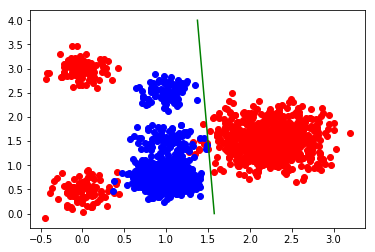

In [173]:
a = model[0].weight.data[0][0]
b = model[0].weight.data[0][1]
c = model[0].bias.data[0]
a,b,c
def getx(y):
    return -(b*y+c)/a
y1,y2 = 0,4
x1,x2 = getx(y1),getx(y2)
plt.plot(pos[:,0],pos[:,1], 'ro')
plt.plot(neg[:,0],neg[:,1], 'bo')
plt.plot([x1,x2],[y1,y2], 'g')

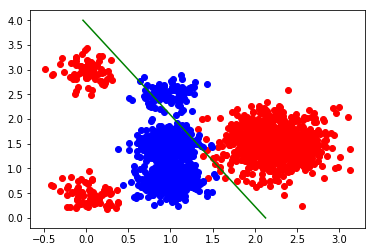

In [43]:
a = model[0].weight.data[0][0]
b = model[0].weight.data[0][1]
c = model[0].bias.data[0]
a,b,c
def getx(y):
    return -(b*y+c)/a
y1,y2 = 0,4
x1,x2 = getx(y1),getx(y2)
plt.plot(pos[:,0],pos[:,1], 'ro')
plt.plot(neg[:,0],neg[:,1], 'bo')
plt.plot([x1,x2],[y1,y2], 'g')

In [48]:
def prec(fx,y):
    return tp(fx,y)/(tp(fx,y)+fp(fx,y))
def rec(fx,y):
    return tp(fx,y)/Yp(y)

In [49]:
prec(model(x),y), rec(model(x),y)

(Variable containing:
  0.7953
 [torch.FloatTensor of size 1], Variable containing:
  0.9210
 [torch.FloatTensor of size 1])

In [48]:
prec(model(x),y), rec(model(x),y)

(Variable containing:
  0.7745
 [torch.FloatTensor of size 1], Variable containing:
  0.9170
 [torch.FloatTensor of size 1])

In [ ]:
x = Variable(X)
y = Variable(Y)
l = Variable(torch.Tensor([0.1]))
f = model

In [ ]:
RatP(f(x),y,l,0.5)

In [ ]:
PatR(f(x),y,l,2)

In [ ]:
tp(f,x,y)

In [ ]:
tpl(f,x,y)

In [ ]:
fp(f,x,y)

In [ ]:
fpu(f,x,y)

In [ ]:
Lp(f,x,y)

In [ ]:
Ln(f,x,y)